 ### 아래 내용은 글로벌 기업 (주)인텔에서 개발한 Intel® AI for Youth Program 내용을 
한국 Implementation Partner사인 (주)Brain AI와 Brain AI Coach Network에서 <br>
우리나라 초, 중, 고 학생들의 AI 교육을 위해 현지화 한 내용입니다. <br>
(주)Brain AI와 NDA를 체결한 학교에서만 사용 가능하며 NDA를 준수해야합니다. <br>
상업적 사용은 불가하며, 학교내에서 학생들 교육활동에 자유롭게 사용가능합니다.

## <B>프로젝트 제목: AI 감정 인식 시스템
얼굴 표정 인식을 통한 상품에 대한 고객 반응 분석 AI

#### Task 1. Open CV와 Matplotlib를 이용한 이미지 불러오기

In [5]:
import cv2

image = cv2.imread("images/person.jpg")

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

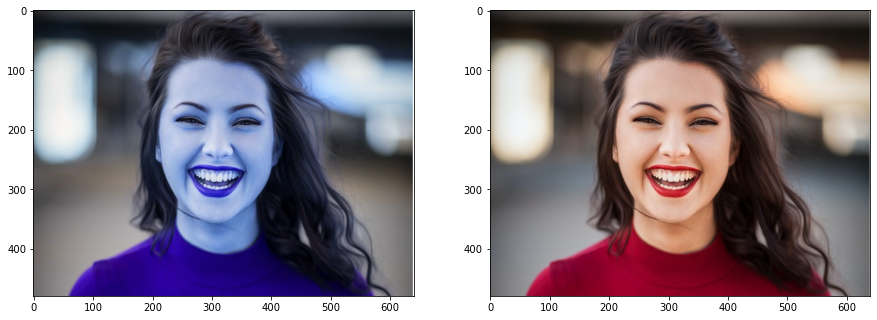

In [2]:
import matplotlib.pyplot as plt

image = cv2.imread("images/person.jpg")
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()

#### Task 2. Pre-trained된 모델을 이용하여 이미지에서 얼굴만 인식하기
OpenVINO™ Toolkit Pre-Trained Models
더 알아보기 <a href="https://docs.openvino.ai/2022.1/model_zoo.html" target="_blank"> 클릭 </a>


In [6]:
# 오픈비노 모델 사용을 위한 라이브러리 불러오기
from utils.opv import OpvModel


In [7]:
# 얼굴 인식 Pre-trained된 모델(face-detection-adas-0001) 불러와 변수(facemodel)에 저장하기 
facemodel = OpvModel("face-detection-adas-0001", device="CPU", fp="FP32")

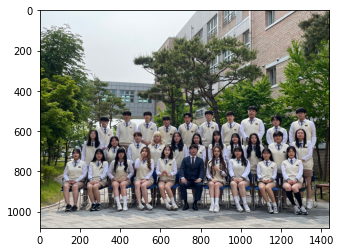

In [8]:
image = cv2.imread("images/group.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()

In [9]:
# 이미지 불러와 얼굴이 어디에 위치하고 있는지 예측(facemodel.Predict(image)하여 변수(predictions)에 저장하기

image = cv2.imread("images/group.jpg")
predictions = facemodel.Predict(image)

In [10]:
# 예측 값 확인하기

print(predictions.shape)
predictions_1 = predictions[0][0]
predictions_1[:, 2]

(1, 1, 200, 7)


array([0.6087664 , 0.46699992, 0.38281378, 0.2709293 , 0.17502303,
       0.1146147 , 0.11418062, 0.08880652, 0.08574185, 0.07964163,
       0.06859101, 0.06819941, 0.06571835, 0.06082546, 0.05968177,
       0.05634204, 0.05499258, 0.04776391, 0.04601292, 0.04383655,
       0.03657793, 0.03378183, 0.03269576, 0.03159329, 0.03065574,
       0.03023863, 0.02879892, 0.02862114, 0.02721812, 0.0266251 ,
       0.02656735, 0.02634216, 0.02617921, 0.02607171, 0.02579265,
       0.02540241, 0.02524604, 0.02477815, 0.02421669, 0.02367862,
       0.02310765, 0.02298589, 0.02284146, 0.02256894, 0.0225469 ,
       0.02253931, 0.02246387, 0.0224434 , 0.02239688, 0.02224609,
       0.02223348, 0.02222818, 0.02218591, 0.02215341, 0.02209494,
       0.02198975, 0.02192646, 0.02192106, 0.02187864, 0.02180568,
       0.02170955, 0.02151161, 0.02138603, 0.02133198, 0.02119357,
       0.02114746, 0.02098247, 0.02083138, 0.02076157, 0.02069433,
       0.02069394, 0.02058447, 0.02041779, 0.02026589, 0.02017

In [15]:
# 예측 값(predictions)를 이용하여 이미지의 얼굴 부분에 박스 그리기

import numpy as np

def DrawBoundingBoxes(predictions, image, conf=.03):
    
    canvas = image.copy()
    predictions_1 = predictions[0][0]
    confidence = predictions_1[:, 2]
    topresults = predictions_1[(confidence > conf)]
    (h, w) = canvas.shape[:2]
    
    for detection in topresults:
        
        box = detection[3:7] * np.array([w, h, w, h])
        (xmin, ymin, xmax, ymax) = box.astype("int")
        img = canvas[ymin:ymax, xmin:xmax].copy()
        
        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)
        
    cv2.putText(canvas, str(len(topresults))+" face(s) detected", (50,50),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)

    return canvas

In [16]:
# 예측 결과 확인하기

canvas = DrawBoundingBoxes(predictions, image)

cv2.imshow("canvas", canvas)   
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Task 3. Pre-trained된 모델을 이용하여 이미지에서 사람 감정 인식하기

In [17]:
from utils.opv import OpvModel

In [18]:
model1 = OpvModel("face-detection-adas-0001", device="CPU", fp="FP32")

In [19]:
import cv2

image = cv2.imread("images/group.jpg")
predictions = model1.Predict(image)

In [20]:
# 감정 라벨링 하기
def EmotionBoxes(predictions):
    
    emotions = {
    0:"neutral",
    1:"happy",
    2:"sad",
    3:"surprise",
    4:"anger"
    }
    
    emotions_people = emotions[np.argmax(predictions[0, :, 0, 0])]
    
    return emotions_people, max(predictions[0, :, 0, 0])

In [23]:
# 얼굴 박스에 감정 인식 결과(라벨링, 예측 확률 %) 텍스트로 표현하기

import numpy as np

def DrawBoundingBoxes(predictions, image, conf=.03):
    
    mymodel2 = OpvModel("emotions-recognition-retail-0003", device="CPU", fp="FP32")
    
    canvas = image.copy()  
    predictions_1 = predictions[0][0]
    confidence = predictions_1[:, 2] 
    topresults = predictions_1[(confidence  >conf)]
    (h,w) = canvas.shape[:2]
    
    for detection in topresults:
        
        box = detection[3:7] * np.array([w, h, w, h])
        (xmin, ymin, xmax, ymax) = box.astype("int")
        img = canvas[ymin:ymax, xmin:xmax].copy()
        
        predictions_emo = mymodel2.Predict(img)
        emo, max_emo_val = EmotionBoxes(predictions_emo)
        
        print(emo, max_emo_val)
        
        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)
        cv2.putText(canvas, emo+" "+str(round(max_emo_val*100,1))+"%", 
                    (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        
    cv2.putText(canvas, str(len(topresults))+" face(s) detected", (50,50),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
    
    cv2.imshow("canvas",canvas)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return

In [24]:
# 예측 결과 확인하기

DrawBoundingBoxes(predictions, image)

anger 0.3687238
sad 0.49336094
neutral 0.49268496
neutral 0.49434945
sad 0.40752128
neutral 0.5717869
sad 0.39495373
sad 0.54879683
anger 0.54795974
sad 0.5033365
sad 0.58576137
sad 0.8595627
sad 0.6302853
neutral 0.5104398
sad 0.60224706
sad 0.8154579
sad 0.8802777
sad 0.7126439
sad 0.79888725
neutral 0.5139838
neutral 0.47343746
neutral 0.5428233
sad 0.56647146
anger 0.57650447
neutral 0.35442853
neutral 0.41803125


#### Task 4. Pre-trained된 모델 이용 사람 감정 인식한 결과를 피지컬로 실행하기

In [25]:
import cv2
import numpy as np

from utils.opv import OpvModel

In [26]:
# 감정 인식 Pre-trained된 모델(face-detection-adas-0001) 불러와 변수(model1)에 저장하기 
model1 = OpvModel("face-detection-adas-0001", device="CPU", fp="FP32")

In [27]:
# 이미지 불러와 얼굴이 어디에 위치하고 있는지 예측(model1.Predict(image)하여 변수(predictions)에 저장하기
image = cv2.imread("images/person2.jpg")
predictions = model1.Predict(image)

In [28]:
# 감정 인식 Pre-trained된 모델(face-detection-adas-0001) 불러와 변수(model1)에 저장하기 
model2 = OpvModel("emotions-recognition-retail-0003", device="CPU", fp="FP32")

In [29]:
# 감정 라벨링 하기
def EmotionBoxes(predictions):
    
    emotions = {
    0:"neutral",
    1:"happy",
    2:"sad",
    3:"surprise",
    4:"anger"
    }
    
    emotions_people = emotions[np.argmax(predictions[0, :, 0, 0])]
    
    return emotions_people, max(predictions[0, :, 0, 0])

In [30]:
# 얼굴 박스에 감정 인식 결과(라벨링, 예측 확률 %) 텍스트로 표현하기

def DrawBoundingBoxes(predictions, image, conf=.05):
    
    canvas = image.copy()
    predictions_1 = predictions[0][0]
    confidence = predictions_1[:, 2]                   # getting conf value [image_id, label, conf, x_min, y_min, x_max, y_max]
    topresults = predictions_1[(confidence > conf)]     # choosing only predictions with conf value bigger than treshold
    (h, w) = canvas.shape[:2]                        # 
    
    for detection in topresults:
        
        box = detection[3:7] * np.array([w, h, w, h]) # determine box location
        (xmin, ymin, xmax, ymax) = box.astype("int") # assign box location value to xmin, ymin, xmax, ymax
        img = canvas[ymin:ymax, xmin:xmax].copy()
        
        predictions_emo = model2.Predict(img)
        emo, max_emo_val = EmotionBoxes(predictions_emo)
           
        if emo == "neutral":
            Ser_Cmd_Str = 'n'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('neutral')
            Ser_Cmd_Str = ''
        elif emo == "happy":
            Ser_Cmd_Str = 'h'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('happy')
            Ser_Cmd_Str = ''
        elif emo == "sad":
            Ser_Cmd_Str = 's'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('sad')
            Ser_Cmd_Str = '' 
        elif emo == "surprise":
            Ser_Cmd_Str = 'e'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('surprise')
            Ser_Cmd_Str = ''
        elif emo == "anger":
            Ser_Cmd_Str = 'a'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('anger')
            Ser_Cmd_Str = ''
        else:
            Ser_Cmd_Str = 'n'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('none')
            Ser_Cmd_Str = ''
        
        
        
        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)  # make a rectangle
        cv2.putText(canvas, emo+" "+str(round(max_emo_val*100,1))+"%", (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)

    cv2.putText(canvas, str(len(topresults))+" face(s) detected", (50,50), # include text
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)

    cv2.imshow("canvas", canvas)   
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    ser.close()
    return 

In [31]:
import serial
import serial.tools.list_ports

#시리얼 포트 자동 찾기
ports = serial.tools.list_ports.comports()
com =''
for port, desc, hwid in sorted(ports):
    if 'USB' in desc:
        com = port
if com != '':
    print('\n microbit USB detected: ', com)
else:
    print('\n Please connect your microbit to this PC via USB')
    exit()


 microbit USB detected:  COM7


In [32]:
def SerialSendCommand(ser, cmd):
    cmd = str(cmd)
    cmd = cmd + '\n'
    cmd = str.encode(cmd)
    ser.write(cmd)

In [33]:
ser = serial.Serial(com, 115200, timeout=0, parity=serial.PARITY_NONE, 
                    rtscts=0)

DrawBoundingBoxes(predictions, image)

anger


#### Task 5. Pre-trained된 모델을 이용하여 WebCam Live로 사람 감정 인식하기

In [34]:
import cv2
import numpy as np
from utils.opv import OpvModel

facemodel = OpvModel("face-detection-adas-0001", device="CPU", fp="FP32", ncs=1)
emomodel = OpvModel("emotions-recognition-retail-0003", device="CPU", fp="FP32", ncs=2)

emotions = {
    0:"neutral",
    1:"happy",
    2:"sad",
    3:"surprise",
    4:"anger"
}

In [35]:
def EmotionCheck(predictions, image):
    canvas = image.copy()  
    
    emo = emotions[np.argmax(predictions[0,:,0,0])]

    cv2.putText(canvas,emotions[np.argmax(predictions[0,:,0,0])],(50,50),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0,0), 2)
    return canvas, emo

In [36]:
# 얼굴 박스에 감정 인식 결과(라벨링, 예측 확률 %) 텍스트로 표현하기

def DrawBoundingBoxes(predictions, image, emo, conf = 0.6): 
    canvas = image.copy()                           
    predictions = predictions[0][0]
    confidence = predictions[:,2]
    topresults = predictions[(confidence>conf)]
    (h,w) = canvas.shape[:2]
    for detection in topresults:
        box = detection[3:7] * np.array([w, h, w, h]) 
        (xmin, ymin, xmax, ymax) = box.astype("int")
        
        if emo == "neutral":
            Ser_Cmd_Str = 'n'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('neutral')
            Ser_Cmd_Str = ''
        elif emo == "happy":
            Ser_Cmd_Str = 'h'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('happy')
            Ser_Cmd_Str = ''
        elif emo == "sad":
            Ser_Cmd_Str = 's'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('sad')
            Ser_Cmd_Str = '' 
        elif emo == "surprise":
            Ser_Cmd_Str = 'e'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('surprise')
            Ser_Cmd_Str = ''
        elif emo == "anger":
            Ser_Cmd_Str = 'a'
            SerialSendCommand(ser, Ser_Cmd_Str)
                    
            print('anger')
            Ser_Cmd_Str = ''
        else:
            Ser_Cmd_Str = 'n'
            SerialSendCommand(ser, Ser_Cmd_Str)

            print('none')
            Ser_Cmd_Str = ''

        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4) 
        
        cv2.putText(canvas, str(round(detection[2]*100,1))+"%", (xmin, ymin),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        cv2.putText(canvas, str(len(topresults))+" persons(s) detected", (50,100),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        
    return canvas

In [37]:
import serial
import serial.tools.list_ports

#usb 시리얼 포트 찾기
ports = serial.tools.list_ports.comports()
com =''
for port, desc, hwid in sorted(ports):
    if 'USB' in desc:
        com = port
if com != '':
    print('\n microbit USB detected: ', com)
else:
    print('\n Please connect your microbit to this PC via USB')
    exit()
    
ser = serial.Serial(com, 115200, timeout=0, parity=serial.PARITY_NONE, 
                    rtscts=0)


 microbit USB detected:  COM7


In [38]:
def SerialSendCommand(ser, cmd):
    cmd = str(cmd)
    cmd = cmd + '\n'
    cmd = str.encode(cmd)
    ser.write(cmd)

In [39]:
# 웹캠에서 실시간으로 영상 불러와 얼굴인식 및 감정인식 실행하기

camera = cv2.VideoCapture(0)

while(True):
    ret, frame = camera.read()
    if ret == False:
        break
        
    emo_predictions = emomodel.Predict(frame) 
    applied_frame, emo = EmotionCheck(emo_predictions, frame)
    face_predictions = facemodel.Predict(frame)
    applied_frame = DrawBoundingBoxes(face_predictions, applied_frame, emo)
    
    cv2.imshow('Press Spacebar to Exit', applied_frame)
    if cv2.waitKey(1) & 0xFF == ord(' '):
        break

ser.close()
camera.release() 
cv2.destroyAllWindows()

neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
happy
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
happy
neutral
happy
neutral
happy
neutral
neutral
happy
happy
happy
neutral
neutral
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
ne

SerialException: WriteFile failed (PermissionError(13, '장치가 명령을 인식하지 않습니다.', None, 22))

In [ ]:
facemodel.ClearMachine()
emomodel.ClearMachine()